In [23]:
import pandas as pd
import glob
import os
import csv
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

try:
    code_dir
except NameError:
    code_dir = os.getcwd()
    source_dir = code_dir.replace("codes_local", "0_sources")
    out_dir = code_dir.replace("codes_local", "2_ChIP_peak_jaccard")

In [5]:
gene_list_file = source_dir + "/gene_list.csv"
gene_list_df = pd.read_csv(gene_list_file)
gene_list_labels_uniq = set(gene_list_df['labels'])
print(gene_list_labels_uniq)

chip_anno_dir = '/media/pipkin/Rocket2/T_Cell_ChIP/202012_ChIP/3_peak_annotations'
chip_anno_files = glob.glob("%s/*annoDf.csv"%chip_anno_dir)

{'nascent_Il2_promoted', 'd5_KLRG1lo_all', 'sc_P5_arm_up', 'sc_d5_arm_up', 'sc_P3_cl13_up', 'sc_P4_cl13_up', 'sc_P2_arm_up', 'sc_d5_cl13_up', 'd5_KLRG1hi_Runx3_repressed', 'd5_KLRG1lo_Runx3_repressed', 'sc_all', 'd5_KLRG1lo_Runx3_promoted', 'sc_P6_arm_up', 'sc_d8_arm_up', 'sc_P6_cl13_up', 'd5_KLRG1hi_all', 'd5_KLRG1hi_Runx3_promoted', 'nascent_48h_dn', 'sc_P5_cl13_up', 'sc_P7_arm_up', 'sc_P9_arm_up', 'sc_P2_cl13_up', 'sc_P9_cl13_up', 'nascent_all', 'sc_P3_arm_up', 'sc_d8_cl13_up', 'nascent_48h_up', 'nascent_Il2_repressed', 'sc_P7_cl13_up', 'sc_P4_arm_up'}


In [10]:
chip_names = [x.split("/")[-1].replace("_annoDf.csv", "") for x in chip_anno_files]
jaccard_df = pd.DataFrame({"ChIP": chip_names})
chip_genes_n = []
for chip_i_file in chip_anno_files:
    chip_i_df = pd.read_csv(chip_i_file)
    chip_i_genes = set(x for x in chip_i_df['SYMBOL'] if str(x) != 'nan')
    chip_genes_n.append(len(chip_i_genes))
jaccard_df["ChIP gene #"] = chip_genes_n
jaccard_df

,ChIP,ChIP gene #
0,2020_PNAS_KwesiMaliepaard___H3K79me2_naive-CD8,8091
1,2020_PNAS_KwesiMaliepaard___H3K79me2_mem-CD8,7425
2,2020_PNAS_KwesiMaliepaard___H3K4me3_mem-CD8,14161
3,2019_IMMUNITY_Veeken___Eomes_LCMV-d07-CD8,821
4,2018_SCIENCE_Pace_native___H3K9me3_native_invi...,214
...,...,...
77,2013_PLOS_ONE_Lotem___Runx3_invitro-Il2-CD8,2698
78,2013_PLOS_ONE_Lotem___H3K4me1_invitro-NAV-CD8,15785
79,2013_PLOS_ONE_Lotem___H3K4me1_invitro-Il2-CD8,3264
80,2013_IMMUNITY_KIM___Foxo1_naive-CD8-WT,2178


In [7]:
for chip_i_file in chip_anno_files:
    chip_i_jaccard = []
    chip_i_name = chip_i_file.split("/")[-1].replace("_annoDf.csv", "")
    chip_i_df = pd.read_csv(chip_i_file)
    chip_i_genes = set(x for x in chip_i_df['SYMBOL'] if str(x) != 'nan')
    for chip_j_file in chip_anno_files:
        chip_j_name = chip_j_file.split("/")[-1].replace("_annoDf.csv", "")
        chip_j_df = pd.read_csv(chip_j_file)
        chip_j_genes = set(x for x in chip_j_df['SYMBOL'] if str(x) != 'nan')
        chip_i_overlap = chip_i_genes
        chip_j_overlap = chip_j_genes
        ij_jaccard = len(chip_i_overlap & chip_j_overlap) / len(chip_i_overlap | chip_j_overlap)
        chip_i_jaccard.append(ij_jaccard)
    jaccard_df[chip_i_name] = ["{:.4f}".format(x) for x in chip_i_jaccard]
jaccard_df.to_csv("%s/ChIP_jaccard.csv"%out_dir, index=False)         

In [20]:
jaccard_df = pd.read_csv("%s/chip_jaccard.csv"%out_dir)
jaccard_heatmap_df = jaccard_df[chip_names]
jaccard_heatmap_df.index = jaccard_df['ChIP']

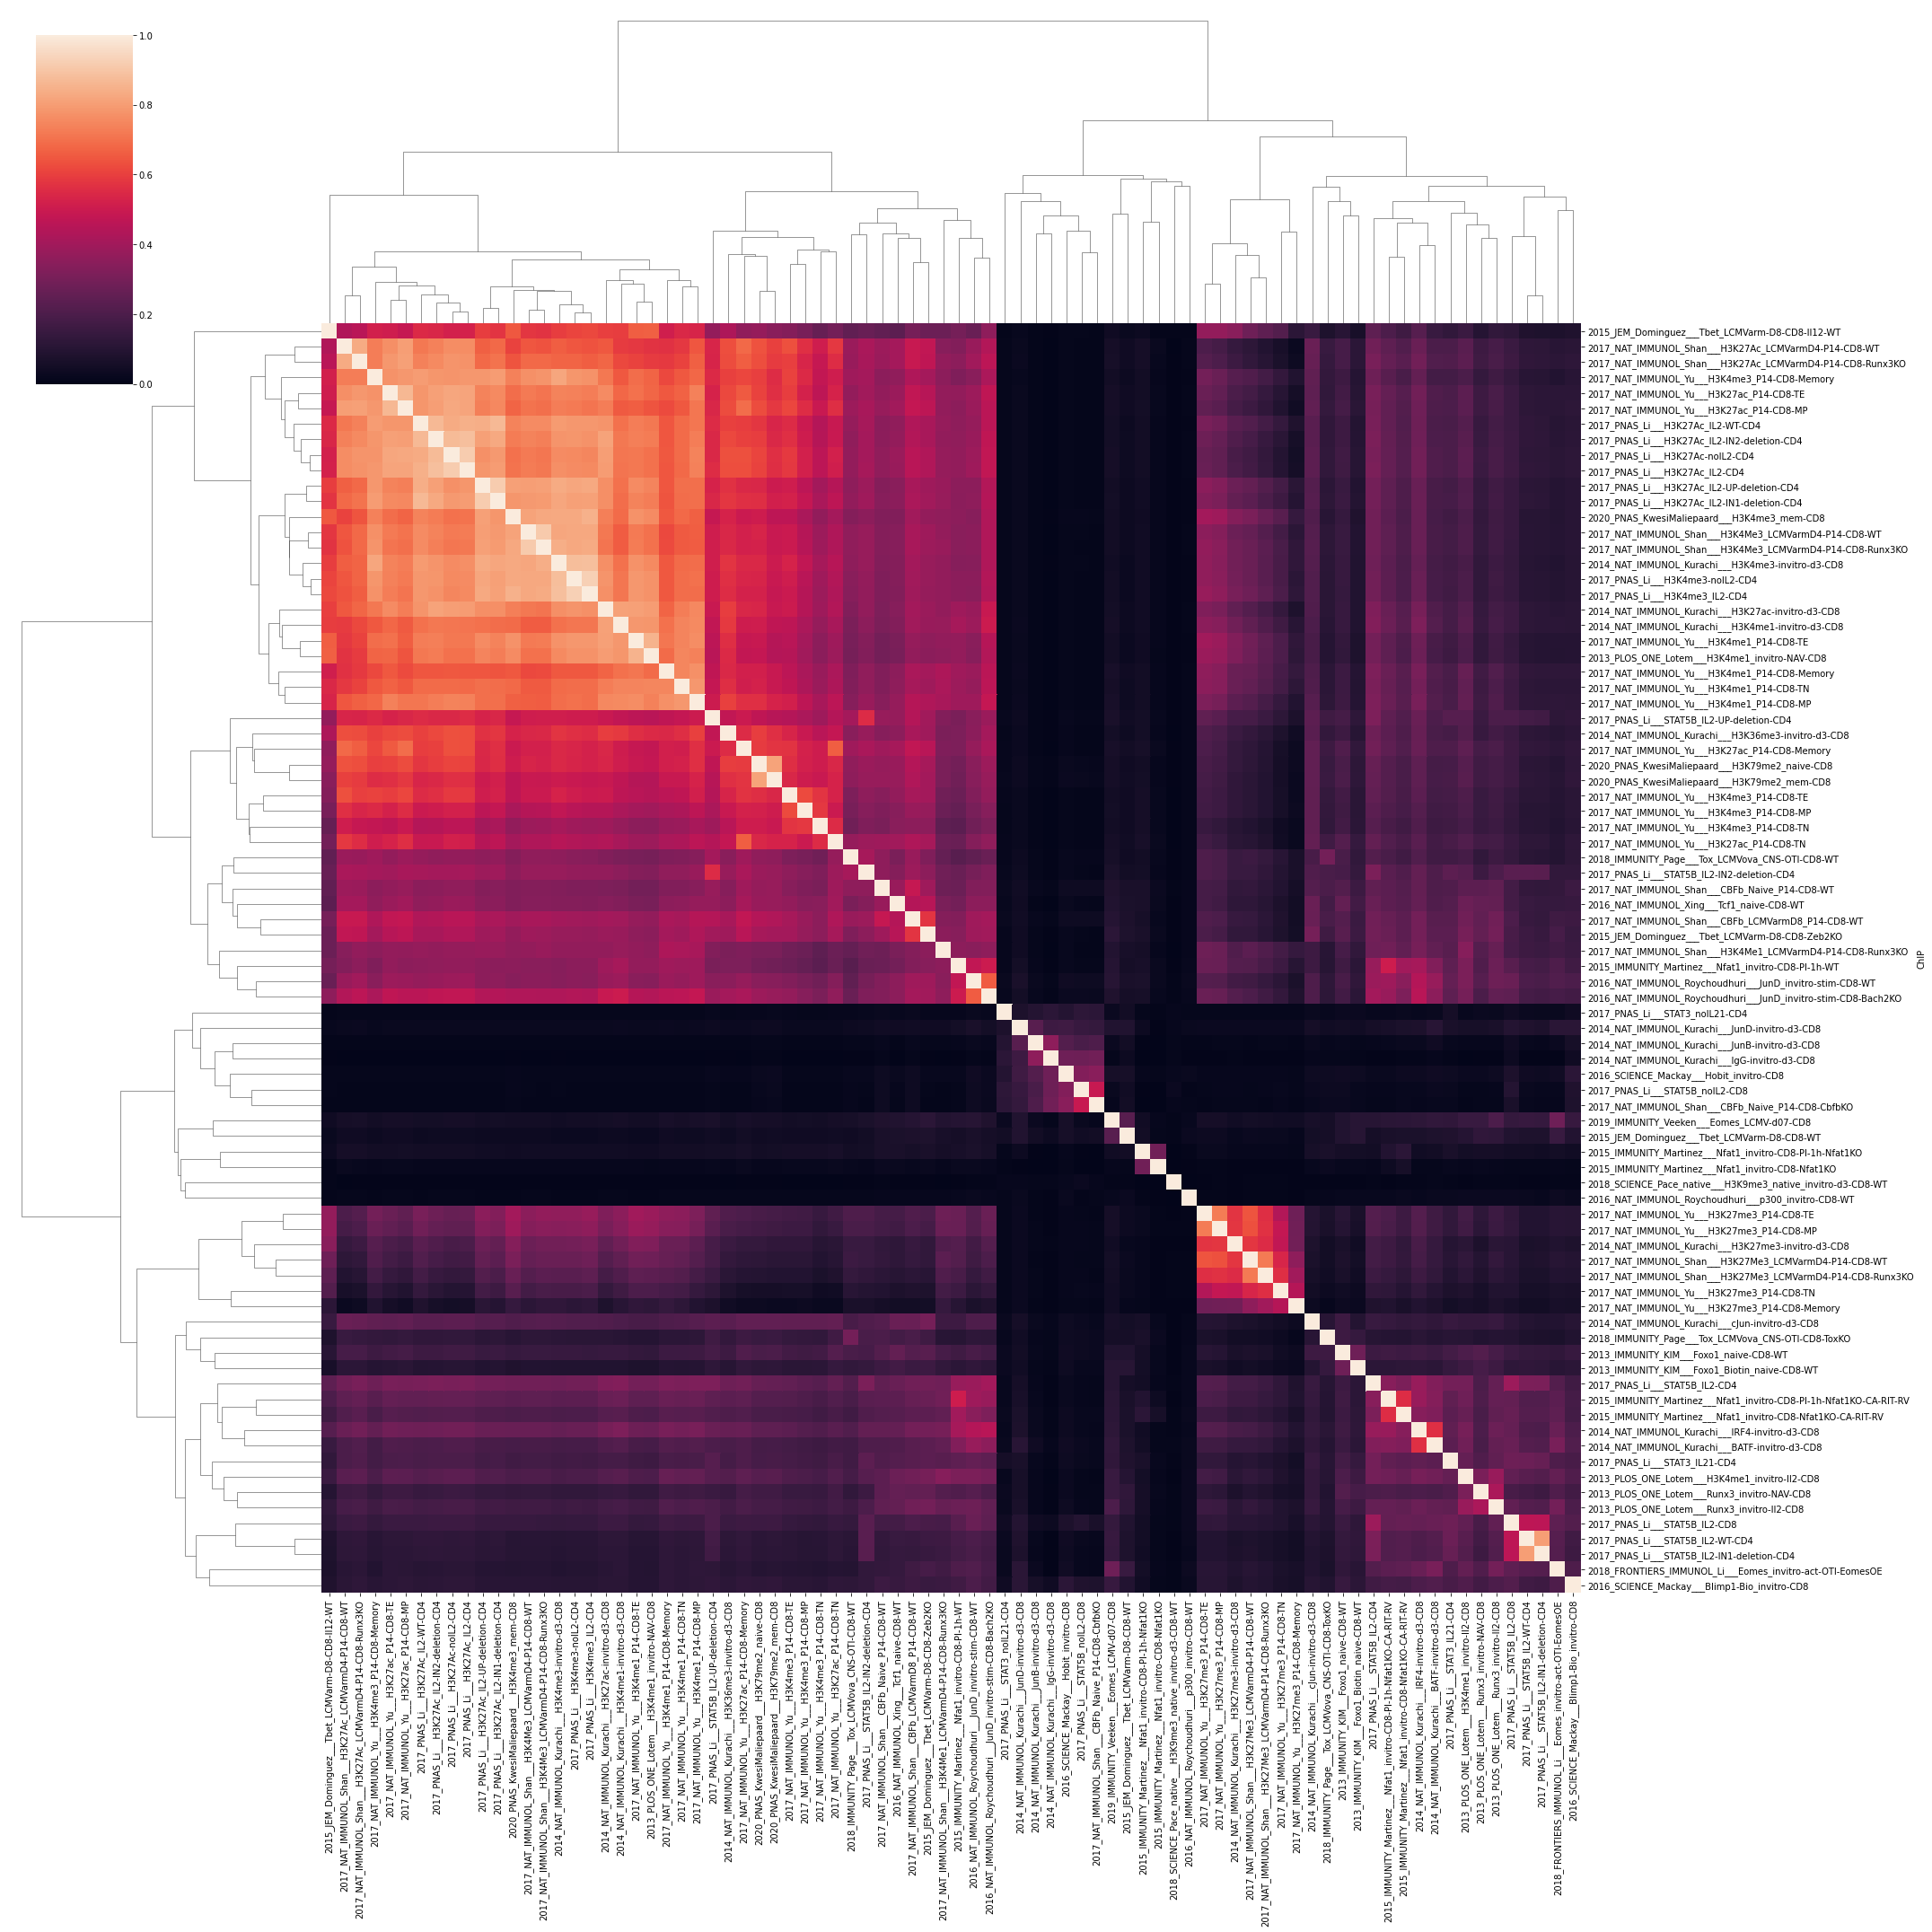

In [77]:
jaccard_clustermap = sns.clustermap(jaccard_heatmap_df, figsize=(30,30))
jaccard_clustermap.savefig("%s/ChIP_clustermap.jpg"%out_dir)

In [57]:
jaccard_dgram = jaccard_clustermap.dendrogram_col.dendrogram
jaccard_order = [chip_names[int(x)] for x in jaccard_dgram['ivl']]
jaccard_order_df = pd.DataFrame({"ChIP": jaccard_order})
jaccard_order_df.to_csv("%s/ChIP_clustermap_order.csv"%out_dir)